Perform the DBSCAN algorithm for weather station clustering. Utilize proper data cleaning and feature selection. Also, plot all outliers of the cluster label.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving WeatherStation.csv to WeatherStation.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("WeatherStation.csv")

print("--- Data Info ---")
df.info()

print("\n--- Missing Values (Initial) ---")
print(df.isnull().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB

--- Missing Values (Initial) ---
Formatted Date   

In [4]:
features = [
    'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
    'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
    'Pressure (millibars)'
]

df_features = df[features]


imputer = SimpleImputer(strategy='median')
df_clean = imputer.fit_transform(df_features)

df_clean = pd.DataFrame(df_clean, columns=features)

print("\n--- Missing Values (After Imputing) ---")
print(df_clean.isnull().sum().any()) # Should be False


--- Missing Values (After Imputing) ---
False


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=20)
labels = dbscan.fit_predict(X_scaled)

df_clean["cluster"] = labels

In [7]:
print("--- DBSCAN Results ---")
print("Unique cluster labels:", np.unique(labels))
print("Number of clusters (excluding outliers):", len(set(labels) - {-1}))
print("Number of outliers (noise points):", sum(labels == -1))

--- DBSCAN Results ---
Unique cluster labels: [-1  0  1  2  3  4  5]
Number of clusters (excluding outliers): 6
Number of outliers (noise points): 6408


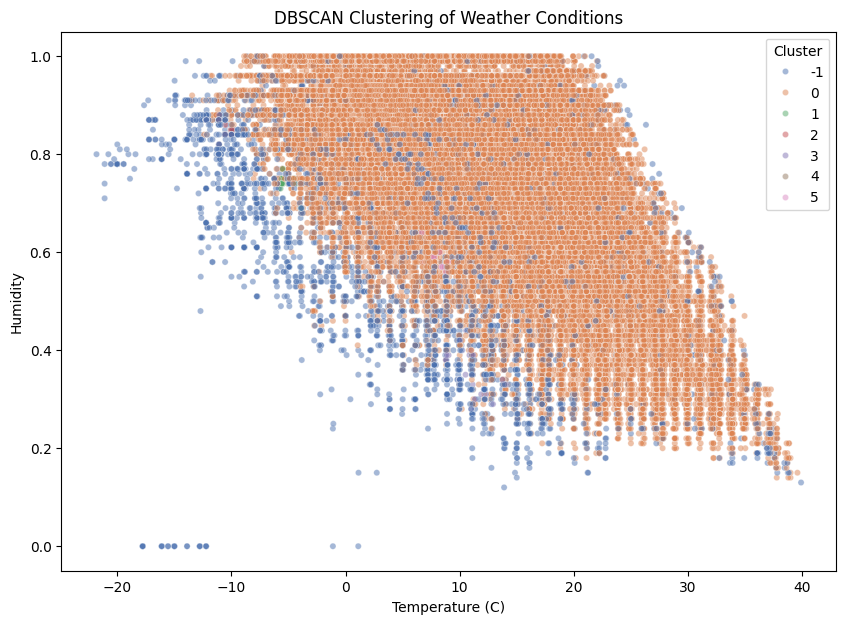

In [8]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df_clean["Temperature (C)"],
    y=df_clean["Humidity"],
    hue=df_clean["cluster"],
    palette="deep",
    s=20,
    alpha=0.5
)
plt.title("DBSCAN Clustering of Weather Conditions")
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")
plt.legend(title="Cluster")
plt.show()

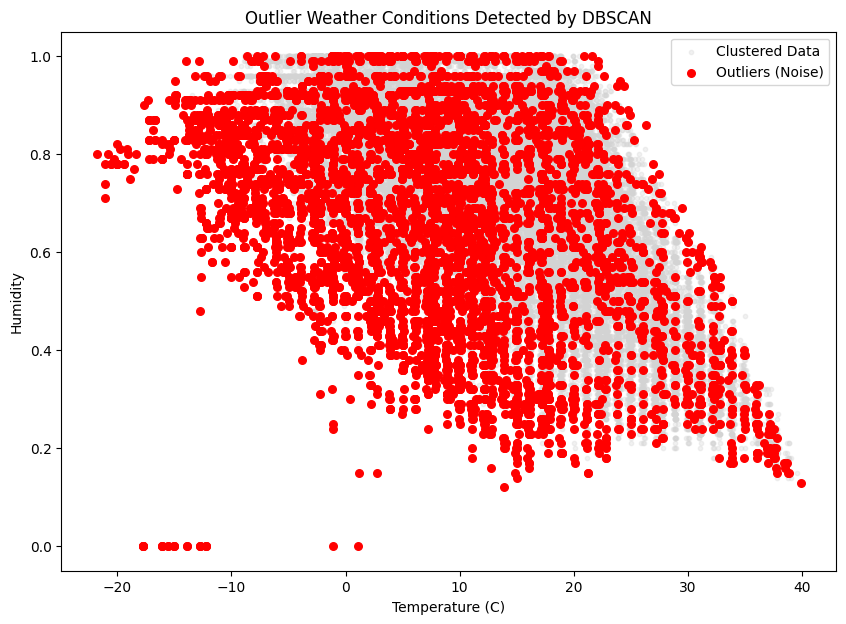

In [9]:
outliers = df_clean[df_clean["cluster"] == -1]

plt.figure(figsize=(10, 7))
# Plot all non-outlier points as a grey background
plt.scatter(df_clean[df_clean["cluster"] != -1]["Temperature (C)"],
            df_clean[df_clean["cluster"] != -1]["Humidity"],
            c="lightgray", s=10, alpha=0.3, label="Clustered Data")

# Plot outliers in red
plt.scatter(outliers["Temperature (C)"], outliers["Humidity"],
            c="red", s=30, label="Outliers (Noise)")

plt.title("Outlier Weather Conditions Detected by DBSCAN")
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")
plt.legend()
plt.show()